### CS102 Assignment - Python Machine Learning

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cluster

In [2]:
# For compatibility across multiple platforms
import os
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

### <font color="green">Regression on World Cup Data</font>

In [3]:
# Read Players.csv into dataframe
f = open('Players.csv','r')
players = pd.read_csv(f)

F = open('Titanic.csv')
Titanic = pd.read_csv(F)

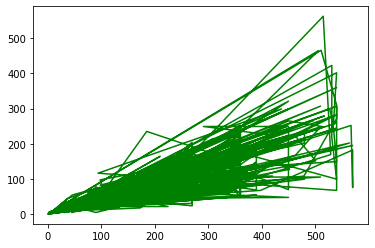

In [4]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
# NOTE: Check the PythonML.ipynb notebook for similar code

plt.plot(players['minutes'],players['passes'], color='green')
plt.show()

#YOUR CODE HERE

In [41]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes

c1 = np.corrcoef(players['passes'],players['minutes'])[1,0]
c2 = np.corrcoef(players['tackles'],players['minutes'])[1,0]
c3 = np.corrcoef(players['shots'],players['minutes'])[1,0]
c4 = np.corrcoef(players['saves'],players['minutes'])[1,0]


print ('Correlation coefficient :', c1)
print ('Correlation coefficient :', c2)
print ('Correlation coefficient :', c3)
print ('Correlation coefficient :', c4)




Correlation coefficient : 0.815119315795487
Correlation coefficient : 0.6106734613835508
Correlation coefficient : 0.40792307740541645
Correlation coefficient : 0.22847723253087981


In [39]:
# Use linear regression for an interactive number-of-passes predictor,
# similar to the interactive temperature predictor in PythonML.iynb.
# For the training data, compute a minutes-passes regression for players from
# Greece, USA, and Portugal.
# NOTE: Check the PythonML.ipynb notebook for similar code

# train = players[(players.team =='Greece') | (players.team=='USA') | (players.team=='Portugal')]

# plt.scatter(train.minutes,train.passes)
# a,b = np.polyfit(train.minutes,train.passes,1)
# x1 = min(train.minutes)
# x2 = max(train.minutes)
# plt.plot([x1,x2],[a*x1 + b , a*x2 + b],color ='red')
# plt.show()

# while True:
#     name = input('Enter surname (or "quit" to quit): ')
#     if name == 'quit': break
#     player = players[players['surname'] == name]
#     player
#     if len(player) ==0:
#         print('player not in dataset')
#     else:
#         print ('Predicted passes:', a * float(player.minutes) + b)
#         print ('Actual passes:', float(player.passes))



train = players[(players.team =='Greece') | (players.team=='USA') | (players.team=='Portugal')]
train



,surname,team,position,minutes,shots,passes,tackles,saves
211,Avraam Papadopoulos,Greece,defender,270,1,70,8,0
212,Charisteas,Greece,forward,61,0,12,2,0
213,Gekas,Greece,forward,169,3,26,0,0
214,Kapetanos,Greece,forward,29,1,7,0,0
215,Karagounis,Greece,midfielder,180,4,105,7,0
216,Katsouranis,Greece,midfielder,234,2,115,4,0
217,Kyrgiakos,Greece,defender,180,4,40,1,0
218,Moras,Greece,defender,90,0,4,2,0
219,Ninis,Greece,midfielder,47,1,22,4,0
220,Papastathopoulos,Greece,defender,127,0,18,10,0


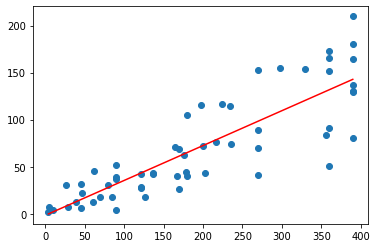

Enter surname (or "quit" to quit): Moras
Predicted passes: 31.624218866473832
Actual passes: 4.0
Correlation coefficient : 0.815119315795487


In [ ]:
# EXTRA CREDIT
# Repeat the previous problem, but use a separate predictor for the four different
# positions (goalkeeper,defender,midfielder,forward). Does it do better?
# Also show the four correlation coefficients -- are they better than the correlation
# coefficient for the single predictor in the previous problem?
#
# Note: Depending how you write your code, if you end up needing to extract a
# string value from a dataframe element you can use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string

#YOUR EXTRA CREDIT CODE HERE

train = players[(players.team =='Greece') | (players.team=='USA') | (players.team=='Portugal')]

plt.scatter(train.minutes,train.passes)
a,b = np.polyfit(train.minutes,train.passes,1)
x1 = min(train.minutes)
x2 = max(train.minutes)
plt.plot([x1,x2],[a*x1 + b , a*x2 + b],color ='red')
plt.show()

Defender = []
Forward = []
Midfielder = []
Goalkeeper = []

while True:
    name = input('Enter surname (or "quit" to quit): ')
    if name == 'quit': break
        
    player = players[players['surname'] == name]
    if player.iloc[0].position == 'defender':
        Defender = (player.iloc[0])
    elif player.iloc[0].position == 'midfielder':
        Midfielder = (player.iloc[0])
    elif player.iloc[0].position == 'forward':
        Forward = (player.iloc[0])
    else:
        Goalkeeper = (player.iloc[0])
        
    if len(player) ==0:
        print('player not in dataset')
    else:
        if player.iloc[0].position == 'defender':
            print ('Predicted passes:', a * float(Defender.minutes) + b)
            print ('Actual passes:', float(Defender.passes))
            print("Correlation coefficient :", np.corrcoef(players['passes'],players['minutes'])[1,0])
        elif player.iloc[0].position == 'midfielder':
            print ('Predicted passes:', a * float(Midfielder.minutes) + b)
            print ('Actual passes:', float(Midfielder.passes))
            print("Correlation coefficient :", np.corrcoef(players['passes'],players['minutes'])[1,0])
        elif player.iloc[0].position == 'forward':
            print ('Predicted passes:', a * float(Forward.minutes) + b)
            print ('Actual passes:', float(Forward.passes))
            print("Correlation coefficient :", np.corrcoef(players['passes'],players['minutes'])[1,0])
        else:
            print ('Predicted passes:', a * float(Goalkeeper.minutes) + b)
            print ('Actual passes:', float(Goalkeeper.passes))
            print("Correlation coefficient :", np.corrcoef(players['passes'],players['minutes'])[1,0])



### <font color="green">Classification on World Cup Data</font>

# Create training and test sets
# First reorder the data by surname to randomize the test set
f = open('Players.csv','r')
players = pd.read_csv(f)
players = players.sort_values(by='surname')
players = players.reset_index(drop=True)
numitems = len(players)
percenttrain = 0.92
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print('Training set', numtrain, 'items')
print('Test set', numtest, 'items')
playersTrain = players[0:numtrain]
playersTest = players[numtrain:]

#### The following four cells use different classification methods to predict a player's position from one of more of minutes, shots, passes, tackles, saves. For each one, try different combinations of parameter settings and features to see how high you can get the accuracy. Turn in your notebook with the best settings in the code.


In [98]:
# K-NEAREST NEIGHBORS
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
neighbors = 10
classifier = KNeighborsClassifier(neighbors)
#이웃한 이웃을 10개 연결시켜준다
classifier.fit(playersTrain[features], playersTrain['position'])
# fit 메소드로 학습시킨다
predictions = classifier.predict(playersTest[features])
# predictions...
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position'])
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

Predicted: defender  Actual: midfielder
Predicted: goalkeeper  Actual: goalkeeper
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: defender  Actual: forward
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: midfielder  Actual: midfielder
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: midfielder  Actual: defender
Predicted: forward  Actual: forward
Predicted: goalkeeper  Actual: goalkeeper
Predicted: defender  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: forward  Actual: defender
Predicted: midfielder  Actual: forward
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: forward  Actual: forward
Predicted: defender  Actual: midfielder
Predicted: defender  Actual: midfielder
Predicted: forward  A

In [99]:
# DECISION TREE
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
split = 10
dt = DecisionTreeClassifier(random_state=0, min_samples_split=split)
# 불순도 min
# parameter is optional
dt.fit(playersTrain[features], playersTrain['position'])
# features의 값들만 리프노드로 쓰겠다. ,훈련

predictions = dt.predict(playersTest[features])
# predictions..

# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position']
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.6458333333333334


In [100]:
# FOREST OF TREES
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
split = 10
trees = 10

rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
#랜덤 포레스트
rf.fit(playersTrain[features], playersTrain['position'])

predictions = rf.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position']
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.6875


In [101]:
# NAIVE BAYES
features = ['minutes', 'shots', 'passes', 'tackles', 'saves']
nb = GaussianNB()
# 가우시안 정규분포
nb.fit(playersTrain[features], playersTrain['position'])
predictions = nb.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position']
    if predictions[i] == playersTest.loc[numtrain+i]['position']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

#Titanic

GaussianNB(priors=None, var_smoothing=1e-09)

In [151]:
# EXTRA CREDIT (similar extra-credit for Titanic data, below)
# Start with the code for K-nearest neighbors above, then extend it to iterate
# through all possible subsets of features and all reasonable values for parameter
# 'neighbors', to find the settings guaranteed to produce the highest accuracy.
# Hint: For generating subsets of features, try 'itertools'

#YOUR EXTRA CREDIT CODE HERE
#Titanic

passengers = Titanic.sort_values(by='first')
passengers = Titanic.reset_index(drop=True)
numitems = len(Titanic)
percenttrain = 0.92
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print('Training set', numtrain, 'items')
print('Test set', numtest, 'items')
playersTrain = passengers[0:numtrain]
playersTest = passengers[numtrain:]
playersTrain = playersTrain.fillna(value = 0)
playersTest = playersTest.fillna(value = 0)

# K-NEAREST NEIGHBORS

# features = ['age','fare','class']
# neighbors = 100
# classifier = KNeighborsClassifier(neighbors)
# playersTrain = playersTrain.fillna(value = 0)
# playersTest = playersTest.fillna(value = 0)

# #이웃한 이웃을 10개 연결시켜준다
# classifier.fit(playersTrain[features], playersTrain['last'])

# # fit 메소드로 학습시킨다
# predictions = classifier.predict(playersTest[features])
# # predictions...
# # Calculate accuracy
# numtrain = len(playersTrain)
# numtest = len(playersTest)
# correct = 0
# for i in range(numtest):
#     #print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['last'])
#     if predictions[i] == playersTest.loc[numtrain+i]['last']: correct +=1
# print('Accuracy:', float(correct)/float(numtest))


# FOREST OF TREES
features = [ 'age', 'class', 'fare']
split = 10
trees = 10

rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
#랜덤 포레스트
rf.fit(playersTrain[features], playersTrain['last'])

predictions = rf.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position']
    if predictions[i] == playersTest.loc[numtrain+i]['last']: correct +=1
print('Accuracy:', float(correct)/float(numtest))


#Gaussian

# features = [ 'age', 'class', 'fare']
# nb = GaussianNB()
# # 가우시안 정규분포

# nb.fit(playersTrain[features], playersTrain['last'])
# predictions = nb.predict(playersTest[features])
# # Calculate accuracy
# numtrain = len(playersTrain)
# numtest = len(playersTest)
# correct = 0
# for i in range(numtest):
# #    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['position']
#     if predictions[i] == playersTest.loc[numtrain+i]['last']: correct +=1
# print('Accuracy:', float(correct)/float(numtest))


Training set 819 items
Test set 72 items
Accuracy: 0.08333333333333333


### <font color="green">Classification on Titanic Data</font>

In [156]:
# Prepare Titanic data for classification
f = open('Titanic.csv','r')
titanic = pd.read_csv(f)
# Compute average age
sumvals = 0
countvals = 0
for i in range(len(titanic)):
    if not pd.isnull(titanic.loc[i]['age']):
        sumvals += titanic.loc[i]['age']
        countvals +=1
avgage = sumvals/countvals
# Convert gender and embarked to numeric values and missing ages to average age
ages = []
genders = []
embarkeds = []
for i in range(len(titanic)):
    if pd.isnull(titanic.loc[i]['age']): ages.append(avgage)
    else: ages.append(titanic.loc[i]['age'])
    if titanic.loc[i]['gender'] == 'M': genders.append(0)
    else: genders.append(1)
    if titanic.loc[i]['embarked'] == 'Cherbourg': embarkeds.append(0)
    elif titanic.loc[i]['embarked'] == 'Southampton': embarkeds.append(1)
    else: embarkeds.append(2)
titanic['age'] = ages
titanic['gender'] = genders
titanic['embarked'] = embarkeds
# Create training and test sets
numitems = len(titanic)
percenttrain = 0.92
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print('Training set', numtrain, 'items')
print('Test set', numtest, 'items')
titanicTrain = titanic[0:numtrain]
titanicTest = titanic[numtrain:]

Training set 819 items
Test set 72 items


#### The following four cells use different classification methods to predict a passenger's survival from one of more of gender, age, class, fare, embarked. For each one, try different combinations of parameter settings and features to see how high you can get the accuracy. Turn in your notebook with the best settings in the code.


In [157]:

# K-NEAREST NEIGHBORS
features = ['gender', 'age', 'class', 'fare', 'embarked']
neighbors = 10
classifier = KNeighborsClassifier(neighbors)
classifier.fit(titanicTrain[features], titanicTrain['survived'])
predictions = classifier.predict(titanicTest[features])
# Calculate accuracy
numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', titanicTest.loc[numtrain+i]['survived']
    if predictions[i] == titanicTest.loc[numtrain+i]['survived']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.6944444444444444


In [159]:
# DECISION TREE
features = ['gender', 'age', 'class', 'fare', 'embarked']
split = 10
dt = DecisionTreeClassifier(random_state=0, min_samples_split=split) # parameter is optional
dt.fit(titanicTrain[features], titanicTrain['survived'])
predictions = dt.predict(titanicTest[features])
# Calculate accuracy
numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', titanicTest.loc[numtrain+i]['survived']
    if predictions[i] == titanicTest.loc[numtrain+i]['survived']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.8333333333333334


In [160]:
# FOREST OF TREES
features = ['gender', 'age', 'class', 'fare', 'embarked']
split = 10
trees = 10
rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
rf.fit(titanicTrain[features], titanicTrain['survived'])
predictions = rf.predict(titanicTest[features])
# Calculate accuracy
numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', titanicTest.loc[numtrain+i]['survived']
    if predictions[i] == titanicTest.loc[numtrain+i]['survived']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.8611111111111112


In [161]:
# NAIVE BAYES
features = ['gender', 'age', 'class', 'fare', 'embarked']
nb = GaussianNB()
nb.fit(titanicTrain[features],titanicTrain['survived'])
predictions = nb.predict(titanicTest[features])
# Calculate accuracy
numtrain = len(titanicTrain)
numtest = len(titanicTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', titanicTest.loc[numtrain+i]['survived']
    if predictions[i] == titanicTest.loc[numtrain+i]['survived']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Accuracy: 0.7916666666666666


In [189]:
# EXTRA CREDIT (similar extra-credit for World Cup data, above)
# Start with the code for K-nearest neighbors above, then extend it to iterate
# through all possible subsets of features and all reasonable values for parameter
# 'neighbors', to find the settings guaranteed to produce the highest accuracy.
# Hint: For generating subsets of features, try 'itertools'

f = open('Players.csv','r')
players = pd.read_csv(f)

# Convert gender and embarked to numeric values and missing ages to average age
position = []

for i in range(len(players)):
    if players.loc[i]['position'] == 'defender': position.append(0)
    elif players.loc[i]['position'] == 'midfielder': position.append(1)
    elif players.loc[i]['position'] == 'forward': position.append(2)
    else: position.append(3)
        

players['position'] = position

# Create training and test sets
numitems = len(players)
percenttrain = 0.92
numtrain = int(numitems*percenttrain)
numtest = numitems - numtrain
print('Training set', numtrain, 'items')
print('Test set', numtest, 'items')
playersTrain = players[0:numtrain]
playersTest = players[numtrain:]


# K-NEAREST NEIGHBORS

features = ['position', 'minutes', 'shots', 'passes', 'tackles','saves']
neighbors = 100
classifier = KNeighborsClassifier(neighbors)
classifier.fit(playersTrain[features], playersTrain['surname'])
predictions = classifier.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
    print ('Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['surname'])
    if predictions[i] == playersTest.loc[numtrain+i]['surname']: correct +=1
print('Accuracy:', float(correct)/float(numtest))

####
# DECISION TREE
features = ['position', 'minutes', 'shots', 'passes', 'tackles','saves']
split = 10
dt = DecisionTreeClassifier(random_state=0, min_samples_split=split) # parameter is optional
dt.fit(playersTrain[features], playersTrain['surname'])
predictions = dt.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['survived']
    if predictions[i] == playersTest.loc[numtrain+i]['surname']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

####
# FOREST OF TREES
features = ['position', 'minutes', 'shots', 'passes', 'tackles','saves']
split = 10
trees = 10
rf = RandomForestClassifier(random_state=0, min_samples_split=split, n_estimators=trees)
rf.fit(playersTrain[features], playersTrain['surname'])
predictions = rf.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', titanicTest.loc[numtrain+i]['survived']
    if predictions[i] == playersTest.loc[numtrain+i]['surname']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

#####
# NAIVE BAYES
features = ['position', 'minutes', 'shots', 'passes', 'tackles','saves']
nb = GaussianNB()
nb.fit(playersTrain[features],playersTrain['surname'])
predictions = nb.predict(playersTest[features])
# Calculate accuracy
numtrain = len(playersTrain)
numtest = len(playersTest)
correct = 0
for i in range(numtest):
#    print 'Predicted:', predictions[i], ' Actual:', playersTest.loc[numtrain+i]['survived']
    if predictions[i] == playersTest.loc[numtrain+i]['surname']: correct +=1
print ('Accuracy:', float(correct)/float(numtest))

Training set 547 items
Test set 48 items
Predicted: Abou Diaby  Actual: Inler
Predicted: Abou Diaby  Actual: Lichtsteiner
Predicted: Alvarez  Actual: Nkufo
Predicted: Abdoun  Actual: Senderos
Predicted: Abdoun  Actual: Shaqiri
Predicted: Aboubakar  Actual: Yakin
Predicted: Abou Diaby  Actual: Ziegler
Predicted: Abou Diaby  Actual: von Bergen
Predicted: Aboubakar  Actual: Abreu
Predicted: Abe  Actual: Arevalo Rios
Predicted: Abe  Actual: Cavani
Predicted: Afolabi  Actual: Caceres
Predicted: Abdoun  Actual: Eguren
Predicted: Aboubakar  Actual: Fernandez
Predicted: Abdoun  Actual: Fernandez
Predicted: Abe  Actual: Forlan
Predicted: Abe  Actual: Fucile
Predicted: Afolabi  Actual: Gargano
Predicted: Abe  Actual: Goduen
Predicted: Aboubakar  Actual: Gonzalez
Predicted: Addy  Actual: Lodeiro
Predicted: Abe  Actual: Lugano
Predicted: Abe  Actual: Maxi Pereira
Predicted: Abe  Actual: Muslera
Predicted: Abe  Actual: Perez
Predicted: Afolabi  Actual: Scotti
Predicted: Abe  Actual: Suarez
Predicte

### <font color="green">Clustering on World Cup Data</font>

In [184]:
# Read Players.csv into dataframe
f = open('Players.csv','r')
players = pd.read_csv(f)

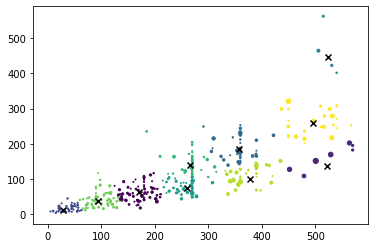

In [199]:
# Create a clustering from the Players data and show it visually in
# a scatterplot. No need for centroids, and no need for meaningful
# clusters -- any clustering will do.
# NOTE: Once again, check the PythonML.ipynb notebook for similar code

kmeans = cluster.KMeans(10)
kmeans.fit(players[['minutes','passes','shots']])
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(players['minutes'],players['passes'],players['shots'],c=labels)
plt.scatter(centroids[:,0], centroids[:,1],marker='x' ,c='black')
plt.show()